## RESEARCH QUESTION:
Is there a significant difference in train punctuality between national and operator specific services using the Network Rail dataset between 2014 and 2023, with an emphasis on the percentage of trains arriving within 15 minutes of their due time?
Delays in train services are usually caused by three factors: operator causes, network infrastructure causes and external causes. Preston et al(2009). The aim of this research is to investigate if the theres a difference in punctuality between National and Operator train services.

## Null Hypothesis (H0):
There is no significant difference in train punctuality between National and Operator specific services in relation to the percentage of trains arriving within 15 minutes.

## Alternative Hypothesis (H1):
There is significant difference in train punctuality between National and Operator specific services in relation to the percentage of trains arriving within 15 minutes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm

Load the National Rail dataset

In [2]:
df_train = pd.read_excel('train_punctuality.xlsx')
df_train

,Time period,National or Operator,Number of recorded\nstation stops,Trains arriving within 59 seconds (percentage),Trains arriving within 3 minutes (percentage),Trains arriving within 15 minutes (percentage)
0,Apr to Jun 2014,Great Britain\n,1.652930e+07,67.822865,87.641925,99.025109
1,Apr to Jun 2014,England and Wales,1.502806e+07,67.681885,87.268017,98.957696
2,Apr to Jun 2014,Scotland,1.501240e+06,69.234144,91.384905,99.699939
3,Apr to Jun 2014,Avanti West Coast,1.702811e+05,47.588505,69.260668,94.478963
4,Apr to Jun 2014,c2c,3.639036e+05,86.719353,96.663873,99.618247
...,...,...,...,...,...,...
961,Oct to Dec 2022 [r],South Western Railway,1.427171e+06,60.085873,80.745576,98.052792
962,Oct to Dec 2022 [r],Southeastern,1.474836e+06,57.463934,78.898435,97.713837
963,Oct to Dec 2022 [r],TfW Rail,6.866729e+05,56.651197,74.273926,96.041960
964,Oct to Dec 2022 [r],TransPennine Express,1.498487e+05,46.468640,66.917769,94.123047


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Time period                                     966 non-null    object 
 1   National or Operator                            966 non-null    object 
 2   Number of recorded
station stops                966 non-null    float64
 3   Trains arriving within 59 seconds (percentage)  966 non-null    float64
 4   Trains arriving within 3 minutes (percentage)   966 non-null    float64
 5   Trains arriving within 15 minutes (percentage)  966 non-null    float64
dtypes: float64(4), object(2)
memory usage: 45.4+ KB


## DATA CLEANING AND MANIPULATION

Display a list of all columns

In [4]:
list(df_train.columns)

['Time period',
 'National or Operator',
 'Number of recorded\nstation stops',
 'Trains arriving within 59 seconds (percentage)',
 'Trains arriving within 3 minutes (percentage)',
 'Trains arriving within 15 minutes (percentage)']

Check for duplicates and null values

In [5]:
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
961    False
962    False
963    False
964    False
965    False
Length: 966, dtype: bool

In [6]:

df_train[df_train.duplicated() == True]


,Time period,National or Operator,Number of recorded\nstation stops,Trains arriving within 59 seconds (percentage),Trains arriving within 3 minutes (percentage),Trains arriving within 15 minutes (percentage)


In [7]:
df_train.isnull().any()

Time period                                       False
National or Operator                              False
Number of recorded\nstation stops                 False
Trains arriving within 59 seconds (percentage)    False
Trains arriving within 3 minutes (percentage)     False
Trains arriving within 15 minutes (percentage)    False
dtype: bool

Create two datasets for the two groups. 

In [8]:
national_services = df_train[df_train['National or Operator'].isin(['Great Britain', 'England and Wales', 'Scotland'])]
national_services

,Time period,National or Operator,Number of recorded\nstation stops,Trains arriving within 59 seconds (percentage),Trains arriving within 3 minutes (percentage),Trains arriving within 15 minutes (percentage)
1,Apr to Jun 2014,England and Wales,1.502806e+07,67.681885,87.268017,98.957696
2,Apr to Jun 2014,Scotland,1.501240e+06,69.234144,91.384905,99.699939
26,Apr to Jun 2015,England and Wales,1.514314e+07,67.473239,86.915139,98.891686
27,Apr to Jun 2015,Scotland,1.517212e+06,67.869772,90.818879,99.692147
52,Apr to Jun 2016,England and Wales,1.569522e+07,65.259674,85.442909,98.615837
...,...,...,...,...,...,...
888,Oct to Dec 2020 [r],Scotland,2.044414e+06,72.319095,90.770435,99.504835
913,Oct to Dec 2021 [r],England and Wales,1.681953e+07,68.183630,85.924851,98.513646
914,Oct to Dec 2021 [r],Scotland,1.863267e+06,63.064462,85.337324,99.222717
940,Oct to Dec 2022 [r],England and Wales,1.524500e+07,62.262421,81.283521,97.760384


In [9]:
national_services.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1 to 941
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Time period                                     74 non-null     object 
 1   National or Operator                            74 non-null     object 
 2   Number of recorded
station stops                74 non-null     float64
 3   Trains arriving within 59 seconds (percentage)  74 non-null     float64
 4   Trains arriving within 3 minutes (percentage)   74 non-null     float64
 5   Trains arriving within 15 minutes (percentage)  74 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.0+ KB


In [10]:
operator_services = df_train[~df_train['National or Operator'].isin(['Great Britain', 'England and Wales', 'Scotland'])]
operator_services

,Time period,National or Operator,Number of recorded\nstation stops,Trains arriving within 59 seconds (percentage),Trains arriving within 3 minutes (percentage),Trains arriving within 15 minutes (percentage)
0,Apr to Jun 2014,Great Britain\n,1.652930e+07,67.822865,87.641925,99.025109
3,Apr to Jun 2014,Avanti West Coast,1.702811e+05,47.588505,69.260668,94.478963
4,Apr to Jun 2014,c2c,3.639036e+05,86.719353,96.663873,99.618247
5,Apr to Jun 2014,Chiltern Railways,2.404340e+05,78.700644,92.196210,99.360828
6,Apr to Jun 2014,CrossCountry,3.056085e+05,50.893060,75.998316,97.199066
...,...,...,...,...,...,...
961,Oct to Dec 2022 [r],South Western Railway,1.427171e+06,60.085873,80.745576,98.052792
962,Oct to Dec 2022 [r],Southeastern,1.474836e+06,57.463934,78.898435,97.713837
963,Oct to Dec 2022 [r],TfW Rail,6.866729e+05,56.651197,74.273926,96.041960
964,Oct to Dec 2022 [r],TransPennine Express,1.498487e+05,46.468640,66.917769,94.123047


## VISUALIZATION

Seaborn and Matplotlib libraries are used to visualize the distribution of the variables.

/Users/oladejiolajubu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oladejiolajubu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


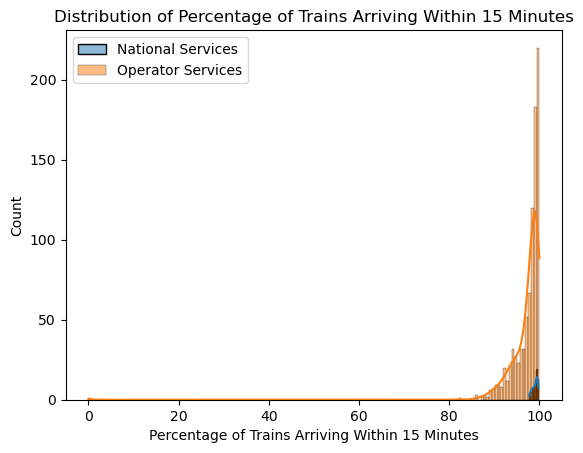

In [11]:
sns.histplot(national_services['Trains arriving within 15 minutes (percentage)'], kde=True, label='National Services')
sns.histplot(operator_services['Trains arriving within 15 minutes (percentage)'], kde=True, label='Operator Services')
plt.title('Distribution of Percentage of Trains Arriving Within 15 Minutes')
plt.xlabel('Percentage of Trains Arriving Within 15 Minutes')
plt.legend()
plt.show()

The graph shows that the distribution of the trains arriving within 15 minutes for the two groups are negatively skewed, therefore a Welch t-test is suitable since it does not assume normality.

## Hypothesis Testing (Welch's t-test)

 The Welch's t-test is performed and the p-value will be compared to a significance level of 0.05.

In [12]:
from scipy.stats import ttest_ind

t_stat, p_value_welch = ttest_ind(national_services['Trains arriving within 15 minutes (percentage)'], operator_services['Trains arriving within 15 minutes (percentage)'], equal_var=False)

print("Welch's t-test p-value:", p_value_welch)

if p_value_welch < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Welch's t-test p-value: 6.264019495749376e-25
Reject the null hypothesis.


## INTERPRETATION OF RESULT

The Welch's t-test results with a p-value of 6.26e-25 shows significant evidence against the null hypothesis. There is a significant relationship in train punctuality between the groups when looking at the percentage of trains arriving within 15 minutes. Suspended services during the covid-19 pandemic could have affected the result.

## CONCLUSION

The data supports the research question, implying that the type of operator has an impact on the punctuality of the trains, it aligns with the earlier research which argues that operators influence train punctuality. These findings contribute to the understanding of train service reliability and can give insight into strategies for improvement in the transportation sector.

## REFERENCES
Asad Khattak, Xin Wang, Sanghoon Son, and Paul Agnello. 2011. Travel by University Students in Virginia, Transportation Research Record 2255:1, 137-145.

John Preston, Graham Wall, Richard Batley, J. Nicolás Ibáñez, and Jeremy Shires. 2009. Impact of Delays on Passenger Train Services, Transportation Research Record 2009 2117:1, 14-23.
